<a href="https://colab.research.google.com/github/Joao-Girotto/Desafio-Python-Marvel/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalações

In [23]:
!pip install matplot dotenv plotly

## Importações

In [27]:
import requests
import hashlib
import os
import time
import pandas as pd
import sqlite3
from dotenv import load_dotenv
import regex as re
import matplotlib.pyplot as plt
import plotly.express as px


## Pegando as chaves

In [4]:
load_dotenv()
PUBLIC_KEY = os.getenv("Public_Key")
PRIVATE_KEY = os.getenv("Private_Key")

## Endpoints e Parâmetros

In [5]:
ts = str(time.time())
to_hash = ts + PRIVATE_KEY + PUBLIC_KEY
hash_md5 = hashlib.md5(to_hash.encode()).hexdigest()

end1 = "https://gateway.marvel.com/v1/public/characters"
end2 = "https://gateway.marvel.com/v1/public/comics"
end3 = "https://gateway.marvel.com/v1/public/books"
end4 = "https://gateway.marvel.com/v1/public/series"
end5 = "https://gateway.marvel.com/v1/public/creators"
end6 = "https://gateway.marvel.com/v1/public/events"
end7 = "https://gateway.marvel.com/v1/public/stories"

offset = 0
params = {
    "apikey": PUBLIC_KEY,
    "ts": ts,
    "hash": hash_md5,
    "limit": 100,
    "offset": offset
}

## Requisição

In [ ]:
response = requests.get(end1, params=params)

response
data = response.json()
data
#df = pd.DataFrame(data['data']['results'])
#df.dtypes
# df_extraido = pd.json_normalize(df['data']['results'])
# df_extraido2 = pd.DataFrame(df['data']['results'])

{'code': 200,
 'status': 'Ok',
 'copyright': '© 2025 MARVEL',
 'attributionText': 'Data provided by Marvel. © 2025 MARVEL',
 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2025 MARVEL</a>',
 'etag': '0abb5390cb186d713808da3ee99124b68ecdcfd1',
 'data': {'offset': 0,
  'limit': 100,
  'total': 1564,
  'count': 100,
  'results': [{'id': 1011334,
    'name': '3-D Man',
    'description': '',
    'modified': '2014-04-29T14:18:17+0000',
    'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/c/e0/535fecbbb9784',
     'extension': 'jpg'},
    'resourceURI': 'https://gateway.marvel.com/v1/public/characters/1011334',
    'comics': {'available': 12,
     'collectionURI': 'https://gateway.marvel.com/v1/public/characters/1011334/comics',
     'items': [{'resourceURI': 'https://gateway.marvel.com/v1/public/comics/24571',
       'name': 'Avengers: The Initiative (2007) #14'},
      {'resourceURI': 'https://gateway.marvel.com/v1/public/comics/21366',
       'name

## Exibição

In [16]:
# dsa = df_extraido['name']
df = df[['name', 'id', 'description']]
con = sqlite3.connect('Marvel.db')
df.to_sql("characters", con, if_exists="replace", index=False)
con.close()

NameError: name 'df' is not defined

# Função para consulta no BD

In [36]:
def consultar_bd(query):
  con2 = sqlite3.connect('Marvel.db')
  df = pd.read_sql_query(query, con2)
  con2.close()

  return df

## Função para fazer as queries


In [7]:
def consultar_api(end, offset=0):
  arraySeries = []
  params['offset'] = offset
  max_tries = 5
  while True:
    tries = 0

    while tries < max_tries:
      try:
        response = requests.get(end,params=params)
        response.raise_for_status()
        data = response.json()

        if data.get('data', {}).get('results', []):
          arraySeries.append(data)
          break

        else:
          print('Falhou, tentando novamente')
          tries += 1
          continue

      except Exception as e:
        print('Tentando novamente, HTTP status code != 200')
        tries += 1
        continue

    if tries == max_tries:
        print('Offset falhou, pulando offset')
        offset += 100
        tries = 0
        params['offset'] = offset

    offset += 100
    tries = 0
    params['offset'] = offset
    print(offset)

    if offset >= data.get('data', {}).get('total', []):
      print('Query finalizada com sucesso')
      break
  return arraySeries

In [ ]:
def create_csv(array, nome_arquivo): ## Array de JSON
  df = pd.DataFrame(array)
  df.to_csv(nome_arquivo)

## Adicionando as series ao banco de dados

In [ ]:
array = query(end4)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
Query finalizada com sucesso


In [ ]:
dataFrameBackUp = pd.DataFrame(array)
dataFrameBackUp.to_csv('Series.csv')

In [ ]:
def calculateDuration(row):
  if row['endYear'] == 2099:
    return 999
  else:
    return row['endYear'] - row['startYear']

def funcao_dict(x):
  creators = [item['name'] for item in x['items']] if isinstance(x, dict) and 'items' in x else []
  return ', '.join(creators)

def amount(x):
  return x.get('available', 0)

con = sqlite3.connect('Marvel.db')
for i in array:
  df = pd.DataFrame(pd.DataFrame(i['data']['results']))
  df['duration'] = df.apply(calculateDuration, axis=1)
  df['creator_name'] = df['creators'].apply(funcao_dict)
  df['character_qty'] = df['characters'].apply(amount)
  df['creator_qty'] = df['creators'].apply(amount)
  df['story_qty'] = df['stories'].apply(amount)
  df['event_qty'] = df['events'].apply(amount)
  df['comic_qty'] = df['comics'].apply(amount)
  df = df[['id', 'title', 'description', 'startYear', 'endYear',
           'rating', 'type', 'duration', 'creator_name', 'creator_qty',
           'character_qty', 'story_qty', 'event_qty', 'comic_qty']]
  df.to_sql("series", con, if_exists="append", index=False)
con.close()

##Pegando do banco de dados

In [ ]:
con2 = sqlite3.connect('Marvel.db')
df2 = pd.read_sql_query("SELECT * FROM series", con2)
con2.close()
df2

,id,title,description,startYear,endYear,rating,type,duration,creator_name,creator_qty,character_qty,story_qty,event_qty,comic_qty
0,6026,(2008),None,2008,2008,Rated a,,0,"Joe Andreani, Rain Beredo, Chris Chuckry, Anto...",34,0,4,0,2
1,31445,Fantastic Four by Dan Slott Vol. 1 (2021),None,2021,2021,,collection,0,Jeff Youngquist,1,0,2,0,1
2,26024,Superior Spider-Man Vol. 2: Otto-matic (2019),None,2019,2019,,collection,0,"Christos Gage, Mike Hawthorne, Lan Medina, Jef...",4,1,2,0,1
3,18454,100th Anniversary Special (2014),None,2014,2014,Rated T,limited,0,"Andy Lanning, Sean Ryan, Jennifer Van Meter, I...",5,7,10,0,5
4,13379,15-Love (2011),None,2011,2011,,,0,"Tommy Ohtsuka, Andi Watson, Jordan D. White",3,0,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,23388,Zombies Assemble 2 (2017),None,2017,2017,,,0,"Matteo Buffagni, Jim Charalampidis, Kiichi Miz...",12,7,18,0,4
15698,22383,ZOMBIES ASSEMBLE VOL. 1 (2017),None,2017,2017,,collection,0,Jeff Youngquist,1,7,2,0,1
15699,24210,Zombies Assemble Vol. 2 Manga (2018),None,2018,2018,,collection,0,"Yusaku Komiyama, Jim Zub, Kiichi Mizushima, Je...",4,7,2,0,1
15700,14112,Zombies Christmas Carol (2011),None,2011,2011,,,0,"David Baldeon, Ferran Daniel, Jordi Tarragona,...",9,1,10,0,5


## INSIGHT 1 Series: Quantidade de issues lançadas por ano

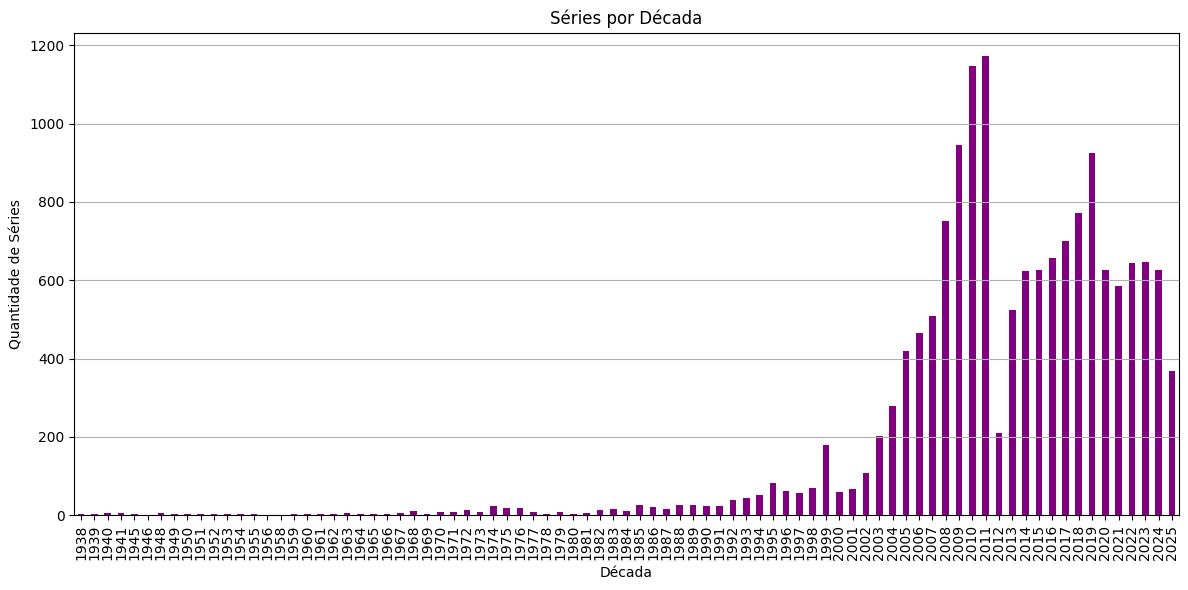

In [ ]:
decade = df2.copy()
duration = decade[(decade['startYear'] > 0) & (decade['startYear'] < 2029)]['startYear'].value_counts().sort_index()
ax = duration.plot(kind='bar', figsize=(12, 6), color='purple', title='Séries por Década')
ax.set_xlabel('Década')
ax.set_ylabel('Quantidade de Séries')
ax.grid(axis='y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## INSIGHT 2 Series: Média da duração das series

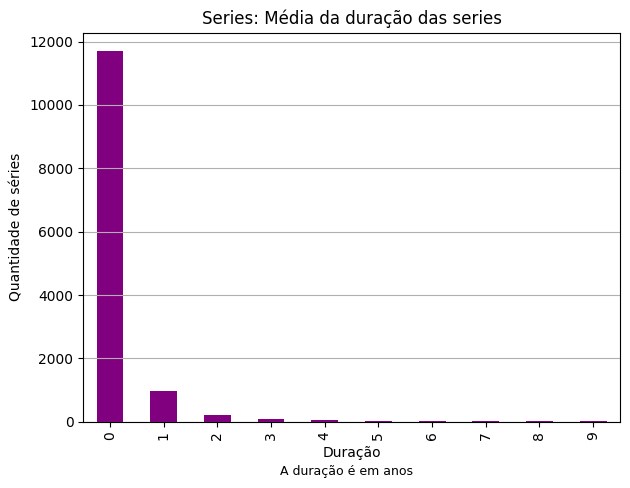

In [ ]:
anos_serie = df2[(df2['duration'] >= 0) & (df2['duration'] < 999)]['duration'].value_counts().sort_index().head(10) ## 999 definido para séries em produção
ax = anos_serie.plot(kind='bar', color='purple', title='Series: Média da duração das series')
ax.set_xlabel('Duração (anos)')
ax.set_ylabel('Quantidade de séries')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
df2[(df2['duration'] >= 0) & (df2['duration'] < 999)]['duration'].mean()

np.float64(0.28381053914102955)

## INSIGHT 3 Series: Dados errados da API em relação a duração

In [ ]:
duration = df2['duration'].value_counts().sort_index()
df2[(df2['duration'] < 0) | (df2['duration'] > 999)]

,id,title,description,startYear,endYear,rating,type,duration,creator_name,creator_qty,character_qty,story_qty,event_qty,comic_qty
3599,7734,Electric Ant (0000 - 2010),None,0,2010,,,2010,"[Pascal Alixe, Lovern Kindzierski, Chris Sot...",8,0,39,0,6
3925,33956,Eternals: 500-Year War Infinity Comic (2029 - ...,"An international, all-star creative team of wr...",2029,2022,,,-7,"[Geoffo, Dan Abnett, Yifan Jiang, David Mac...",21,0,14,0,7
4622,25304,GET FURY (2029 - 2024),None,2029,2024,,collection,-5,[Jeff Youngquist],1,0,2,0,1
5990,5267,Iron Man: Director of S.H.I.E.L.D. (2008 - 2007),"Being one of the world's smartest, wealthiest ...",2008,2007,,,-1,"[Vc Joe Caramagna, Sean Chen, Steve Kurth, ...",15,1,19,2,8
7712,14745,Marvel Super Stars Magazine (2011 - 2010),None,2011,2010,,,-1,[Michael Turner],1,0,1,0,1
9094,13568,Official Handbook of the Ultimate Marvel Unive...,None,2010,2006,,,-4,"[Various, Mark Bagley, Morry Hollowell, Stu...",4,4,7,0,4
9095,13567,Official Handbook of the Ultimate Marvel Unive...,None,2010,2006,,,-4,[],0,0,0,0,0
9471,9932,Punisher Max: Tiny Ugly World (2013 - 2010),None,2013,2010,,,-3,"[David Lapham, Dalibor Talajic]",2,0,2,0,1
10160,3864,SHANNA THE SHE DEVIL: SURVIVAL OF THE FITTEST ...,None,2008,2007,Parental Advisory,,-1,[],0,0,4,0,1
11375,20133,Star Wars: Boba Fett (1997 - 1996),None,1997,1996,,,-1,"[Steve Dutro, Cam Kennedy, John Wagner]",3,0,2,0,1


## INSIGHT 4 Series: Distribuição classificatória de faixa etária

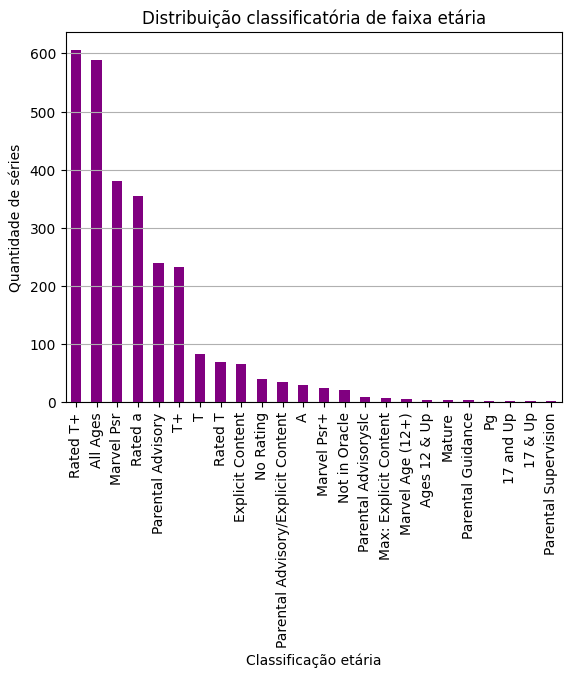

In [ ]:
media = df2[df2['rating'] != '']['rating'].value_counts()
ax = media.plot(kind='bar', title='Distribuição classificatória de faixa etária', color='purple')
ax.grid(axis='y')
ax.set_xlabel('Classificação etária')
ax.set_ylabel('Quantidade de séries')
plt.show()

## INSIGHT 5 Series: Distribuição dos tipos de séries

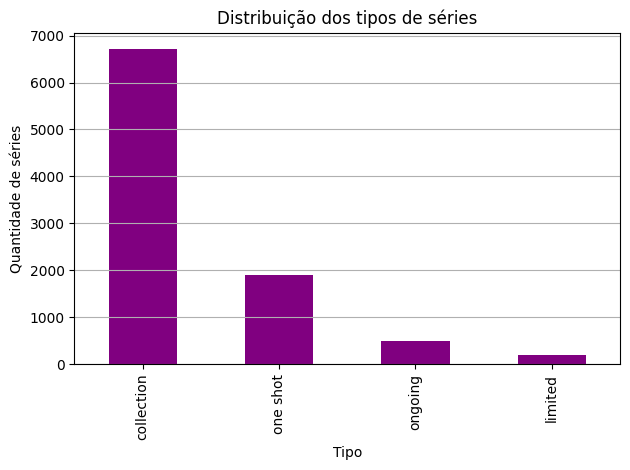

In [ ]:
series_type = df2[df2['type'] != '']['type'].value_counts()
ax = series_type.plot(kind='bar', title='Distribuição dos tipos de séries', color='purple')
ax.grid(axis='y')
ax.set_xlabel('Tipo')
ax.set_ylabel('Quantidade de séries')
plt.tight_layout()
plt.show()

## INSIGHT 6 Series: Quantidade de personagens por ano

In [57]:
def series_quantidade_personagens_ano(dataframe, mostrar_grafico=False):

  tempo = dataframe[(dataframe['character_qty'] > 0) & (dataframe['startYear'] > 1900) & (dataframe['startYear'] < 2029)].groupby('startYear')['character_qty'].sum()
  falta_anos = pd.Series(0, index=range(1939, 2025))
  arrumado =  falta_anos.add(tempo, fill_value=0)

  if mostrar_grafico:
    ax = arrumado.plot(kind='bar',title='Quantidade de personagens por ano', color='purple', figsize=(20, 6))
    ax.grid(axis='y')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Quantidade de personagens')
    plt.show()

  return arrumado

# Comics

In [ ]:
def comics_adicionar_bd(array_json) ## Deve ser um array contendo o JSON de response, cada índice é um JSON, NÃO remover o header do response para passar pra função

  def funcao_series(x):
    return x.get('name', '') if isinstance(x, dict) else ''

  def funcao_price(x):
      if isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict):
          return x[0].get('price', '')
      return ''

  con = sqlite3.connect('Marvel.db')

  for i in array_json:
    df = pd.DataFrame(pd.DataFrame(i['data']['results']))
    df['price'] = df['prices'].apply(funcao_price)
    df['series_name'] = df['series'].apply(funcao_series)
    df = df[['id', 'digitalId','title', 'issueNumber', 'description',
             'format', 'pageCount', 'series_name', 'price']]

    df.to_sql("comics", con, if_exists="append", index=False)

  con.close()

In [ ]:
array = consultar_api(end2) ## Endereço de comics
create_csv(array, "Comics.csv")
comics_adicionar_bd(array)

## INSIGHT 1 Comics: Média de preço sobre o tempo

In [ ]:
def comics_media_preco_tempo(dataframe, mostrar_grafico=False): ## O DataFrame deve ser o DataFrame pós-adição no banco de dados, com os headers HTTP já removidos
  def extract_number(text):
    match = re.findall(r'\d+', text)
    return int(match[0]) if match else None

  dataframe['year'] = dataframe['title'].apply(extract_number)
  preco_sobre_tempo = dataframe[['year', 'price']]

  preco_sobre_tempo['year'] = preco_sobre_tempo[(preco_sobre_tempo['year'] > 1900) & (preco_sobre_tempo['year'] < 2050)]['year']
  preco_filtrado = preco_sobre_tempo.query('price > 0 and price < 20').copy()
  preco_filtrado = preco_filtrado.dropna()
  preco_filtrado_medio = preco_filtrado.groupby('year').mean()

  if mostrar_grafico:
    plt.figure(figsize=(20, 6))
    plt.plot(preco_filtrado_medio.index, preco_filtrado_medio['price'], color='purple', label='Preço Médio')
    plt.scatter(preco_filtrado['year'], preco_filtrado['price'], color='grey', label='Preços individuais', alpha=0.4, s=10)

  return preco_filtrado_medio

## INSIGHT 2 Comics: Média de páginas sobre o tempo

In [56]:
def comics_media_pgs_tempo(dataframe, mostrar_grafico=False): ## O DataFrame deve ser o DataFrame pós-adição no banco de dados, com os headers HTTP já removidos

  def extract_number(text):
    match = re.findall(r'\d+', text)
    return int(match[0]) if match else None

  dataframe['year'] = dataframe['title'].apply(extract_number)
  pags_sobre_tempo = dataframe[['year', 'pageCount']]
  pags_sobre_tempo['year'] = pags_sobre_tempo[(pags_sobre_tempo['year'] > 1900) & (pags_sobre_tempo['year'] < 2050)]['year']
  pags_filtrada = pags_sobre_tempo.query('pageCount > 0 and pageCount < 200')
  pags_filtrada = pags_filtrada.dropna()
  pags_filtrada_media = pags_filtrada.groupby('year').mean()

  if mostrar_grafico:
    ax = pags_filtrada_media.plot(title='Média de páginas', color='purple')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média de páginas')
    ax.grid(axis='y')
    plt.tight_layout()
    plt.show()

  return pags_filtrada_media

## INSIGHT 3 Comics: Os formatos mais comuns

In [33]:
def comics_formato_mais_comum(dataFrame, mostrar_grafico=False): ## O DataFrame deve ser o DataFrame pós-adição no banco de dados, com os headers HTTP já removidos
  formatos = dataFrame[dataFrame['format'] != '']['format'].value_counts()

  if mostrar_grafico:

    fig = px.bar(
        formatos,
        x=tipos.index,
        y=tipos.values,
        labels={'x': 'Formato', 'y': 'Quantidade de comics'},
        title='Quantidade de cada tipo',
        color_discrete_sequence=['purple']
    )

    fig.update_layout(
        xaxis_title='Formato',
        yaxis_title='Quantidade de comics',
        xaxis_tickangle=-45
    )

    fig.show()

  return formatos

# Stories

## Função para adicionar os stories ao BD

In [52]:
def stories_adicionar_bd(array_json): ## Deve ser um array contendo o JSON de response, cada índice é um JSON, NÃO remover o header do response para passar pra função
  con4 = sqlite3.connect('Marvel.db')
  for i in array_json:
    df4 = pd.DataFrame(pd.DataFrame(i['data']['results']))
    df4 = df4[['id', 'title', 'description', 'type']]
    df4.to_sql("stories", con4, if_exists="append", index=False)
  con4.close()

## Função para calcular a quantidade de cada tipo de stories

In [50]:
def stories_quantidade_tipo(dataframe, mostrar_grafico=False): ## O DataFrame deve ser o DataFrame pós-adição no banco de dados, com os headers HTTP já removidos
  tipos = dataframe[dataframe['type'] != '']['type'].value_counts()

  if mostrar_grafico:

    fig = px.bar(
        tipos,
        x=tipos.index,
        y=tipos.values,
        labels={'x': 'Tipo', 'y': 'Quantidade'},
        title='Quantidade de cada tipo',
        color_discrete_sequence=['purple']
    )

    fig.update_layout(
        xaxis_title='Tipos',
        yaxis_title='Quantidade',
        xaxis_tickangle=-45
    )

    fig.show()

  return tipos

In [ ]:
array = consultar_api(end7)
create_csv(array, "Stories.csv")
stories_adicionar_bd(array)

## INSIGHT 1 Stories: Quantidade de cada tipo




In [51]:
dataframe = consultar_bd("SELECT * FROM stories")
tipos = stories_quantidade_tipo(dataframe, mostrar_grafico=True)
